# Problem 1: Predicting CentralAir using SalePrice
 In this problem, you will build a Classification Tree model to predict CentralAir using SalePrice and judge its accuracy

In [201]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [202]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [203]:
print("Data type : ", type(data))
print("Data dims : ", data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (1460, 81)


In [204]:
print(data.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


### a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit two Classification Tree models (of max depth 2 and max depth 4) on the Train set to predict CentralAir using SalePrice. Print the tree in each case.
### b) Print the confusion matrix on Train set and Test set for both the aforesaid models. Compute and print for both the trees the Classification Accuracy, True Positive Rate, False Positive Rate. Which of the two models is better?

In [205]:
def ClassTree(predictor, response, depth):
    # Split the data into predictor and response variables
    X = pd.DataFrame(data[predictor])
    y = pd.DataFrame(data[response])

    # Split the dataset into training and testing subsets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Fit the decision tree model to the training data
    dtree = DecisionTreeClassifier(max_depth=depth)
    dtree.fit(X_train, y_train)

    # Evaluate the model on the training and testing data
    train_acc = dtree.score(X_train, y_train)
    test_acc = dtree.score(X_test, y_test)

    # Print the accuracy scores
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t:", train_acc)
    print()

    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t:", test_acc)
    print()

    # Plot the decision tree
    plt.figure(figsize=(48,24))
    plot_tree(dtree, filled=True, rounded=True, 
              feature_names=[predictor], 
              class_names=["N","Y"])
    plt.show()
    
    # Predict response corresponding to predictor
    y_train_pred = dtree.predict(X_train)
    y_test_pred = dtree.predict(X_test)
    
    # Plot the two-way Confusion Matrix
    plt.figure(figsize=(6,4))
    train_cm = confusion_matrix(y_train, y_train_pred)
    sb.heatmap(train_cm,
               annot = True, fmt=".0f", annot_kws={"size": 18})
    plt.title("Train Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.show()
    
    TP = train_cm[1][1]
    FN = train_cm[1][0]

    # Compute the TPR
    TPR = TP / (TP + FN)
    FPR = FN / (TP + FN)

    print("True Positive Rate: {:.4f}".format(TPR))
    print("False Positive Rate: {:.4f}".format(FPR))

    plt.figure(figsize=(6,4))
    test_cm = confusion_matrix(y_test, y_test_pred)
    sb.heatmap(test_cm, 
               annot = True, fmt=".0f", annot_kws={"size": 18})
    plt.title("Test Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.show()
    
    TP = test_cm[1][1]
    FN = test_cm[1][0]

    # Compute the TPR
    TPR = TP / (TP + FN)
    FPR = FN / (TP + FN)

    print("True Positive Rate: {:.4f}".format(TPR))
    print("False Positive Rate: {:.4f}".format(FPR))

---

#### Max Depth: 2

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9452054794520548

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9315068493150684



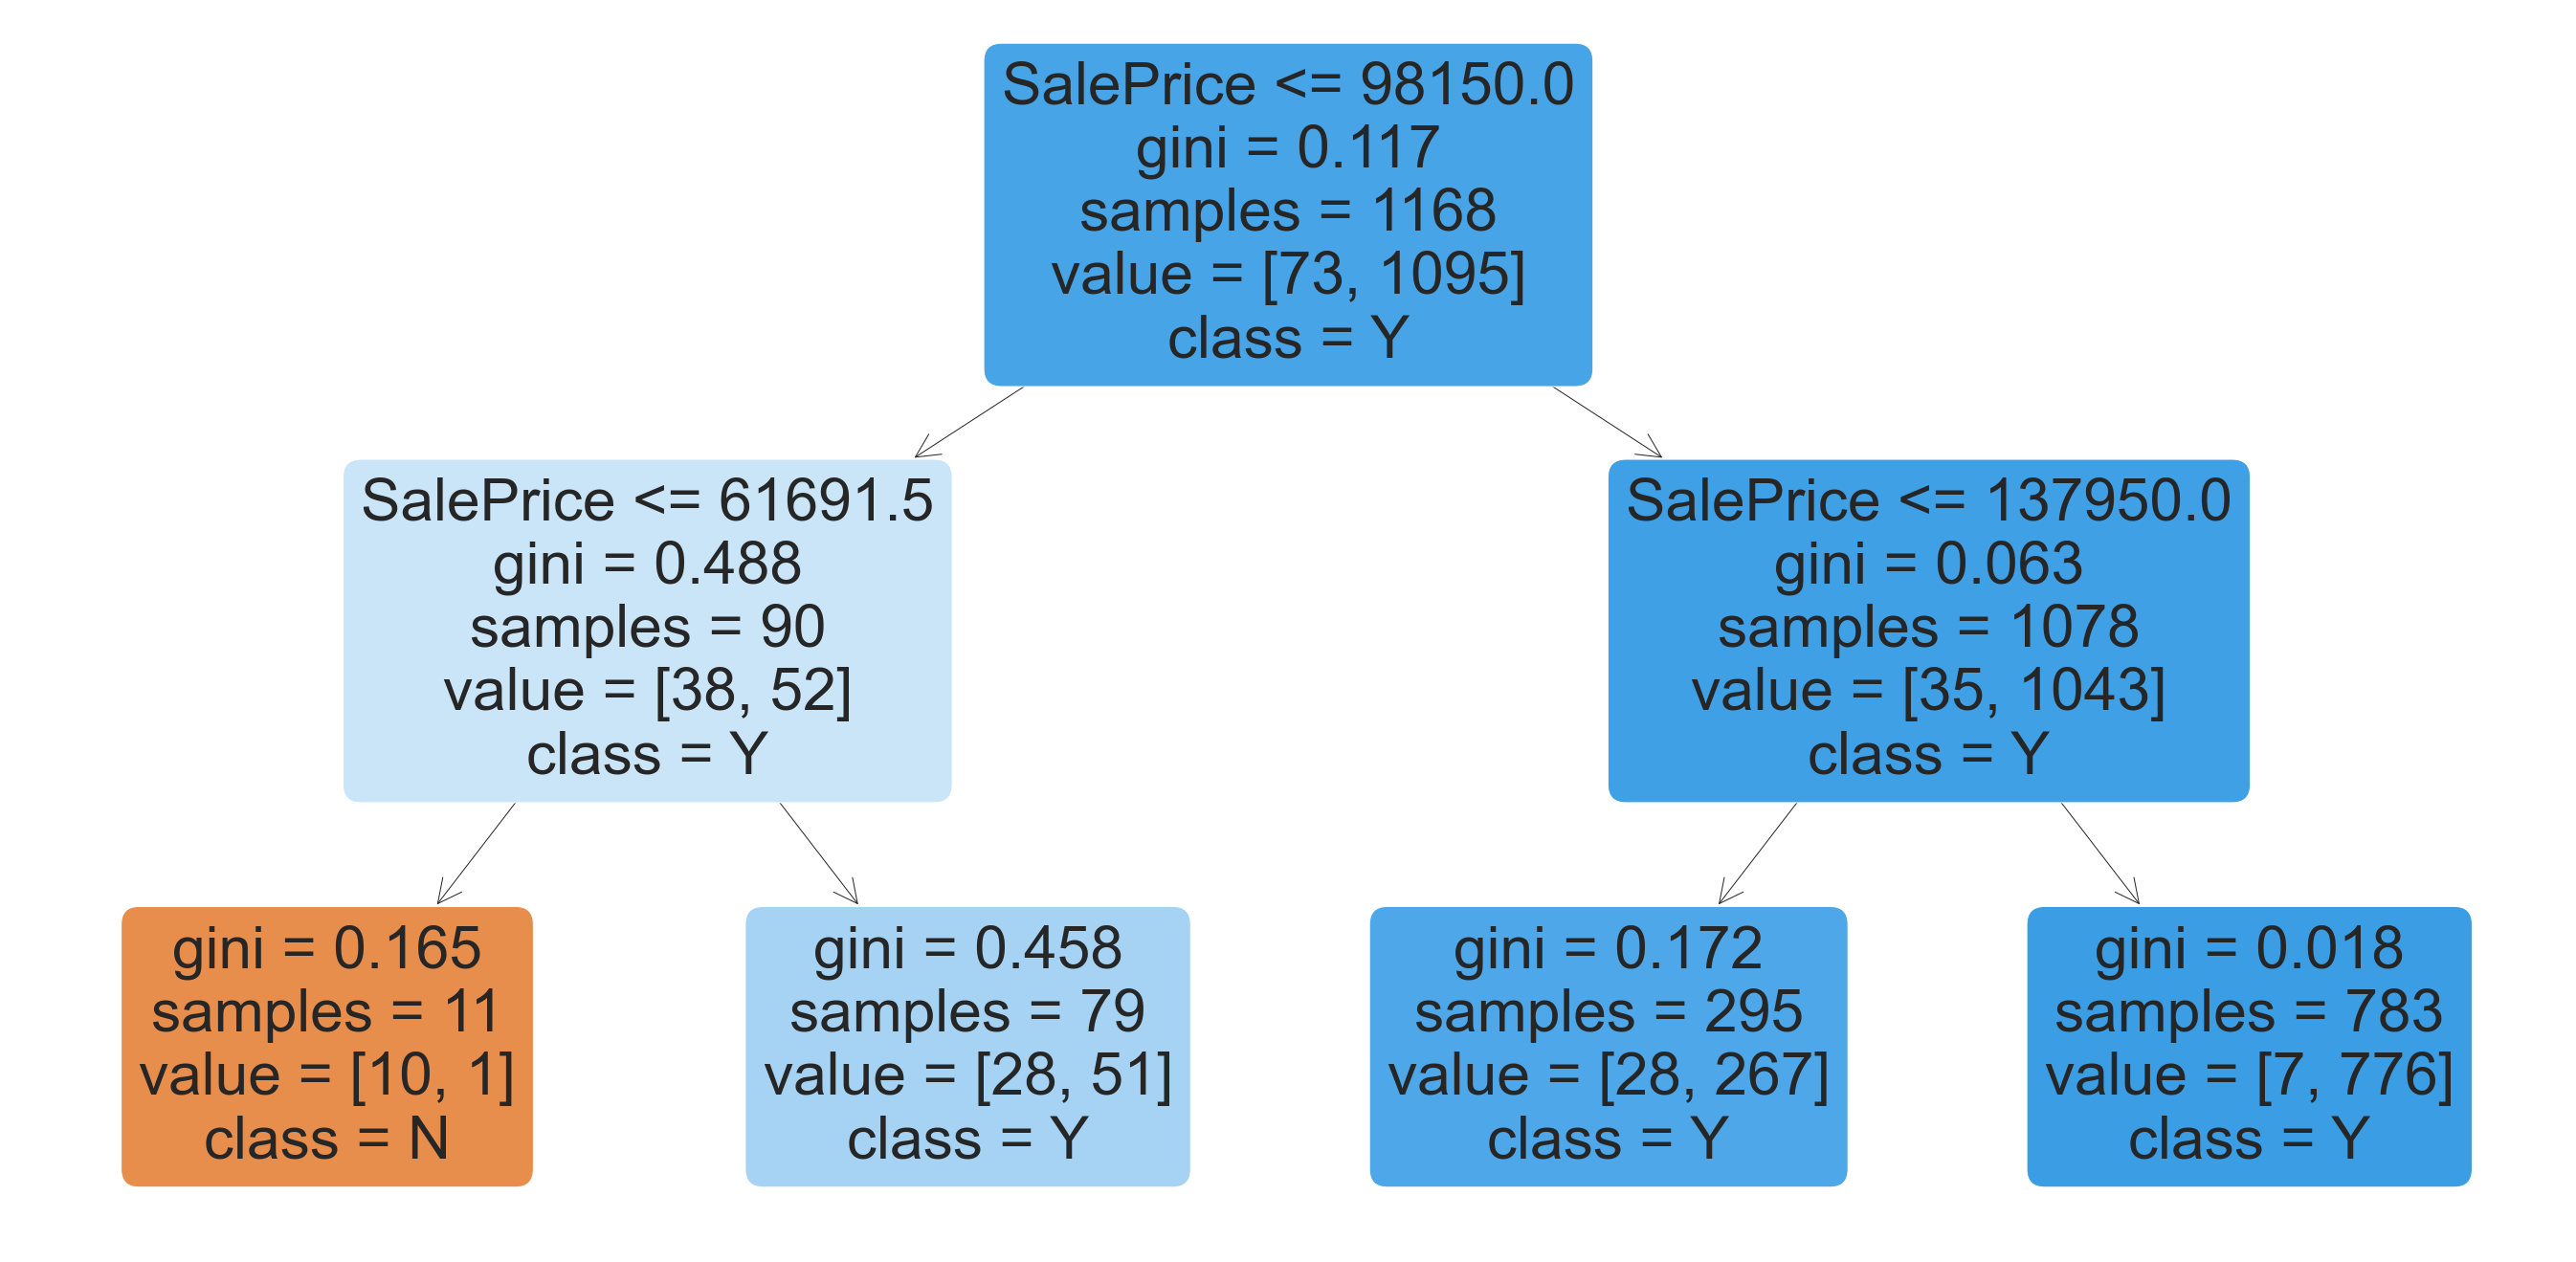

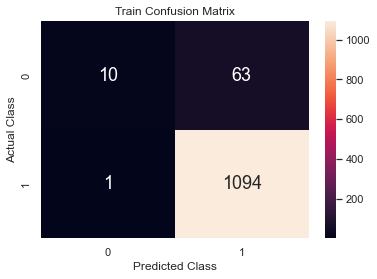

True Positive Rate: 0.9991
False Positive Rate: 0.0009


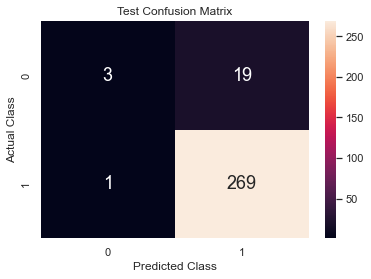

True Positive Rate: 0.9963
False Positive Rate: 0.0037


In [213]:
ClassTree("SalePrice", "CentralAir", 2)

---

#### Max Depth: 4

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9383561643835616

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9657534246575342



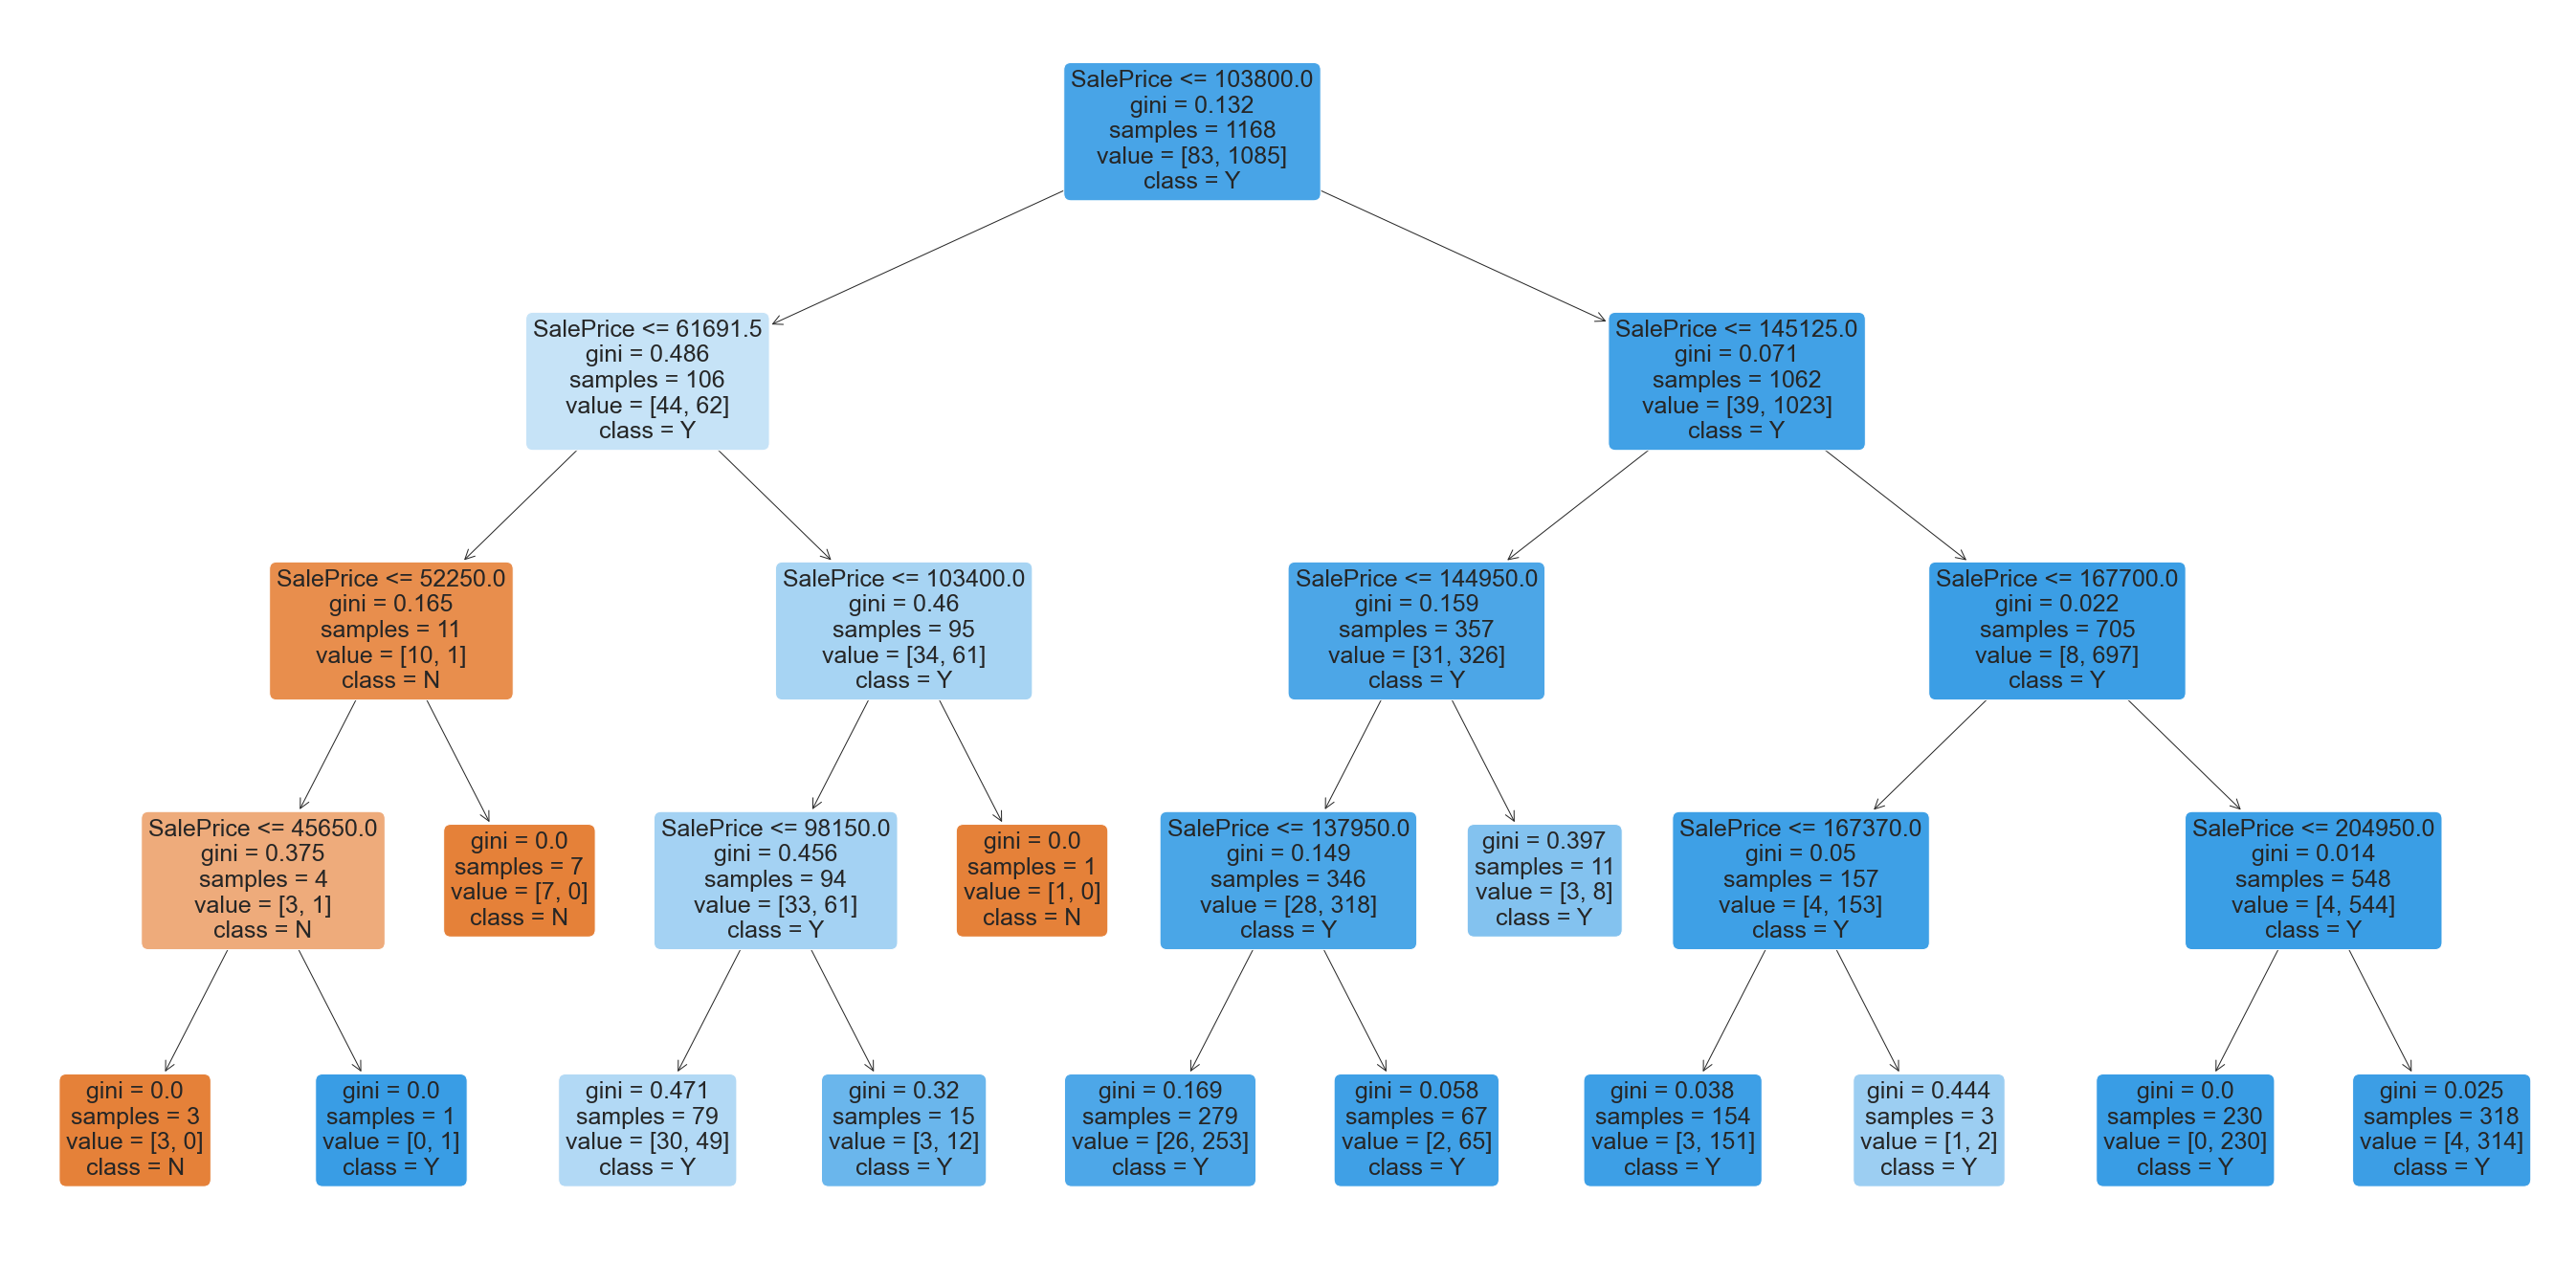

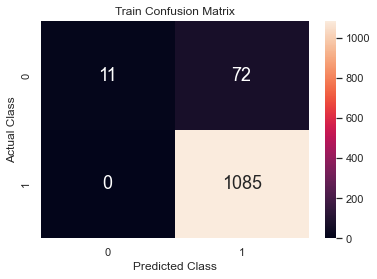

True Positive Rate: 1.0000
False Positive Rate: 0.0000


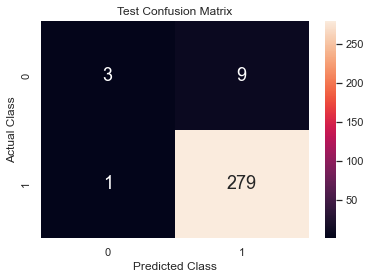

True Positive Rate: 0.9964
False Positive Rate: 0.0036


In [215]:
ClassTree("SalePrice", "CentralAir", 4)

#### Answer:
Classification Accuracy for both models generally range between 0.92-0.97 for both Train and Test sets depending on how the data set was divided into Train/Test sets. However, model with max depth 4 generally see more consistently higher Classification Accuracy.

True Positive Rate and False Positive Rate are also comparable. However, model with max depth 4 generally see consistently lower False Positive Rate.

Overall, for this data set, model with max depth 4 is a little bit better, but generally the 2 models are still comparable with little differences in Classification Accuracy or True/False positive rate.

---

# Problem 2: Predicting CentralAir using Other Variables

### Following the steps from the previous problem, build two new uni-variate Classification Tree models (of max depth 4) to predict CentralAir using the variables OverallQual and YearBuilt. Justify which of the variables is the best predictor.

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9426369863013698

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.928082191780822



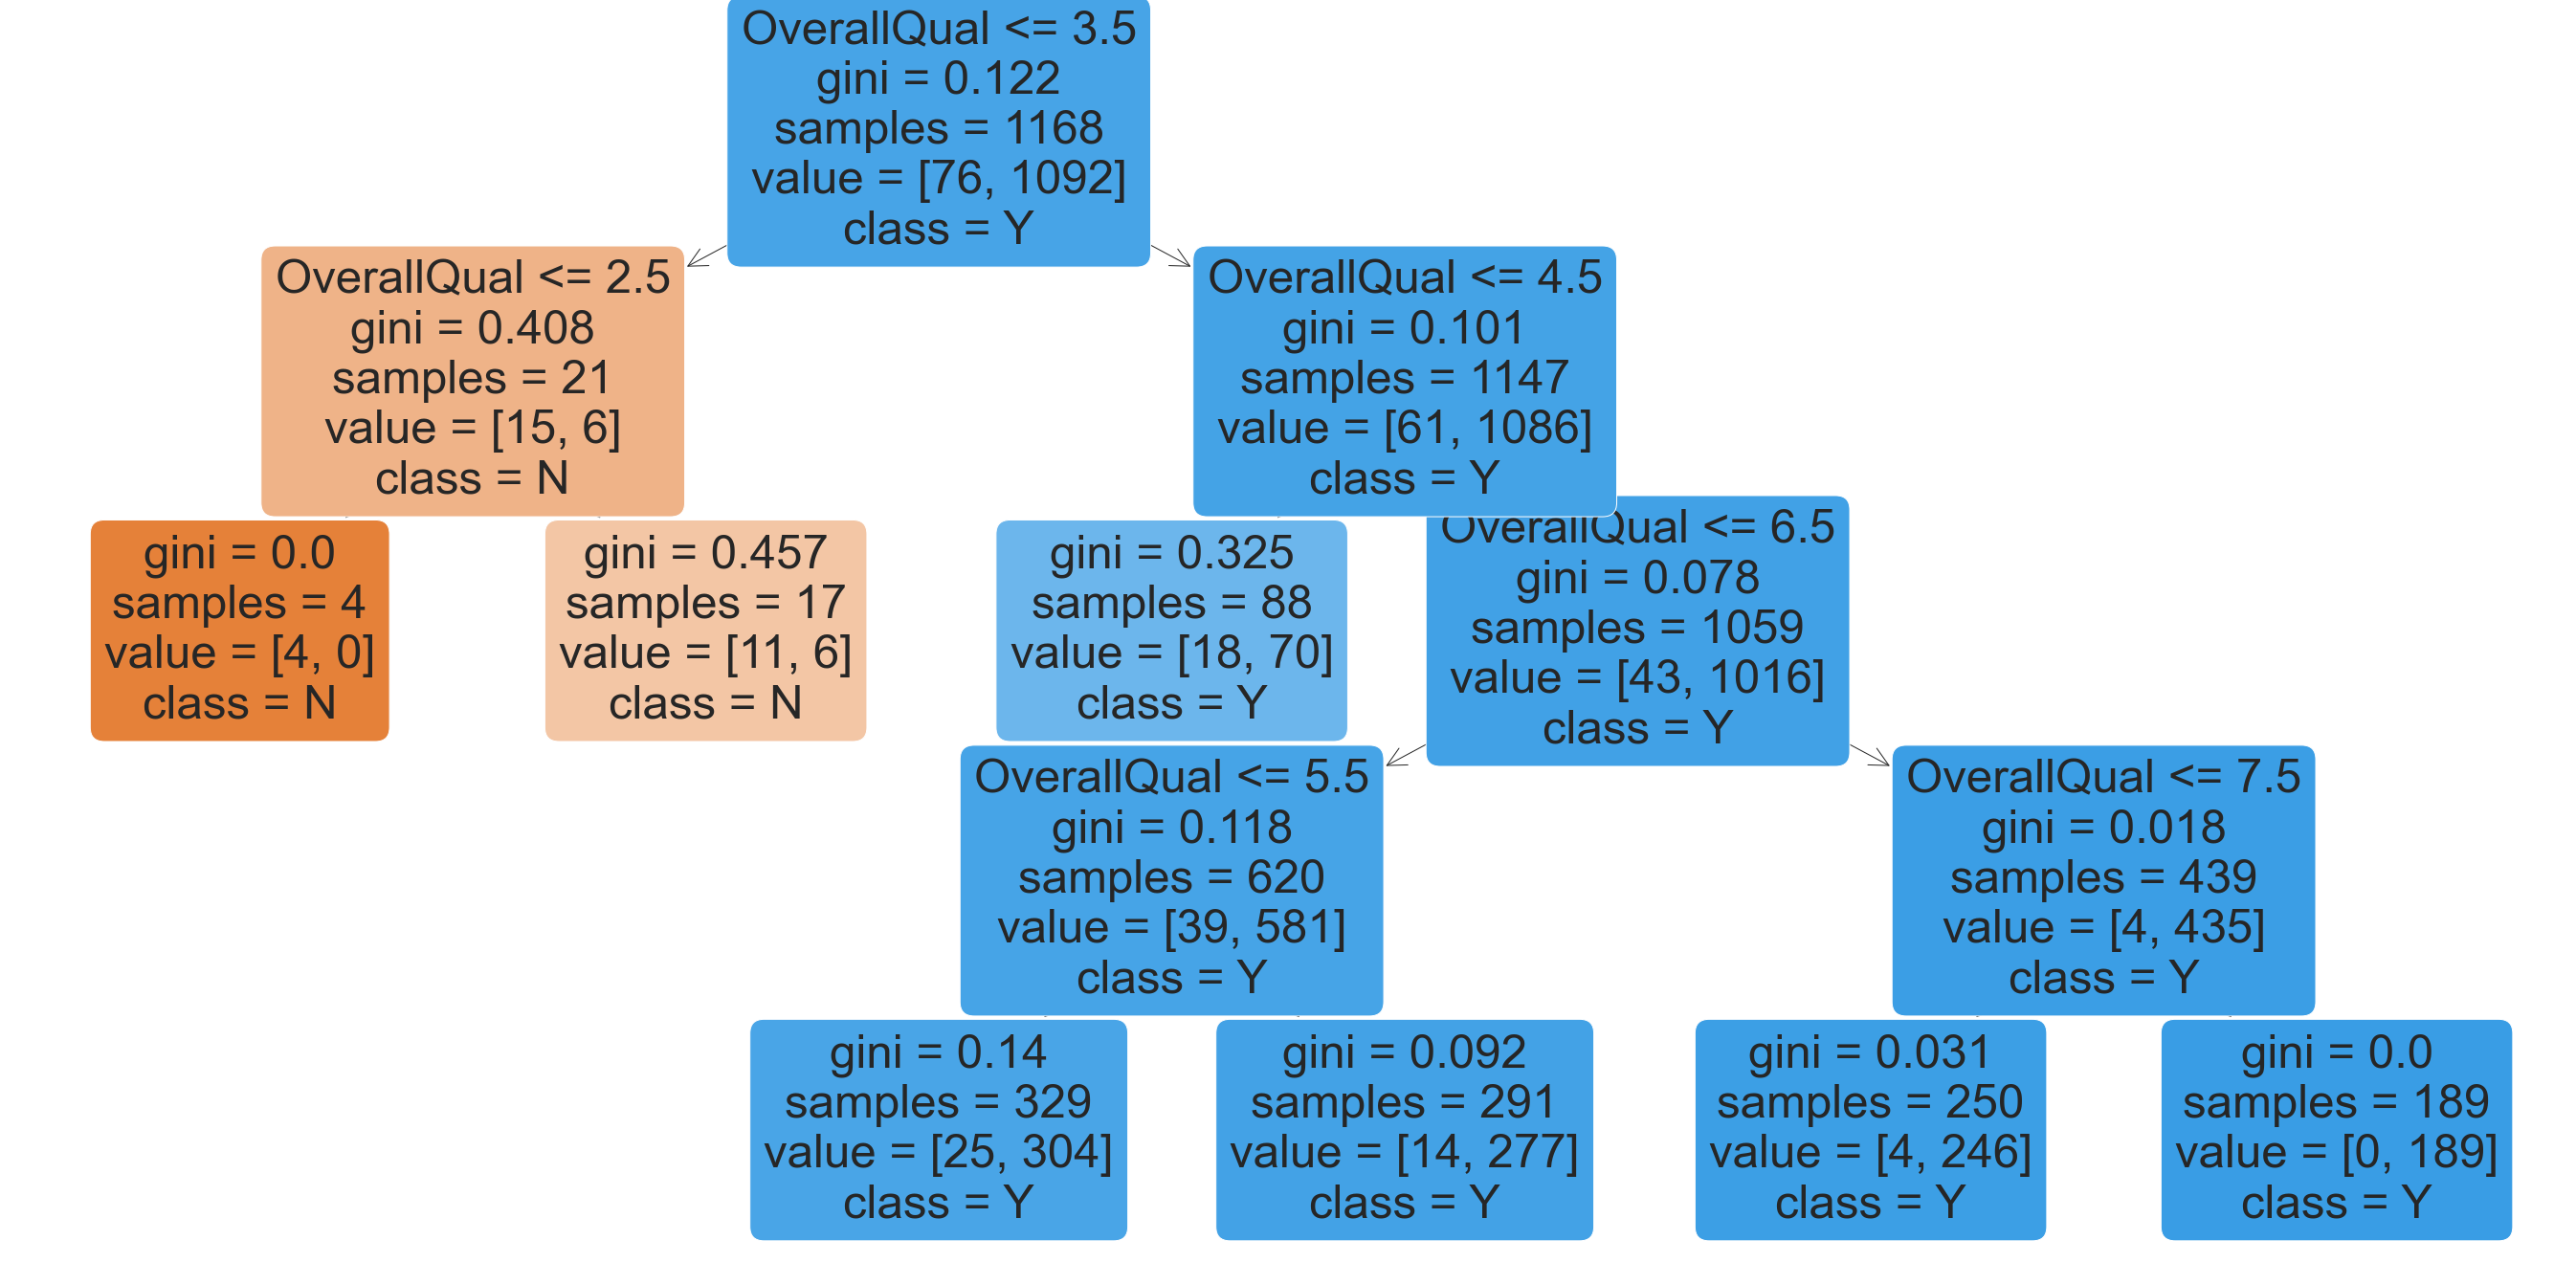

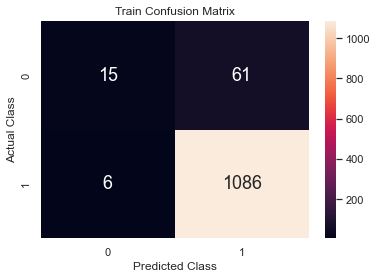

True Positive Rate: 0.9945
False Positive Rate: 0.0055


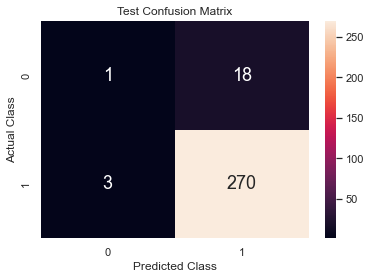

True Positive Rate: 0.9890
False Positive Rate: 0.0110


In [223]:
ClassTree("OverallQual", "CentralAir", 4)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9383561643835616

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9246575342465754



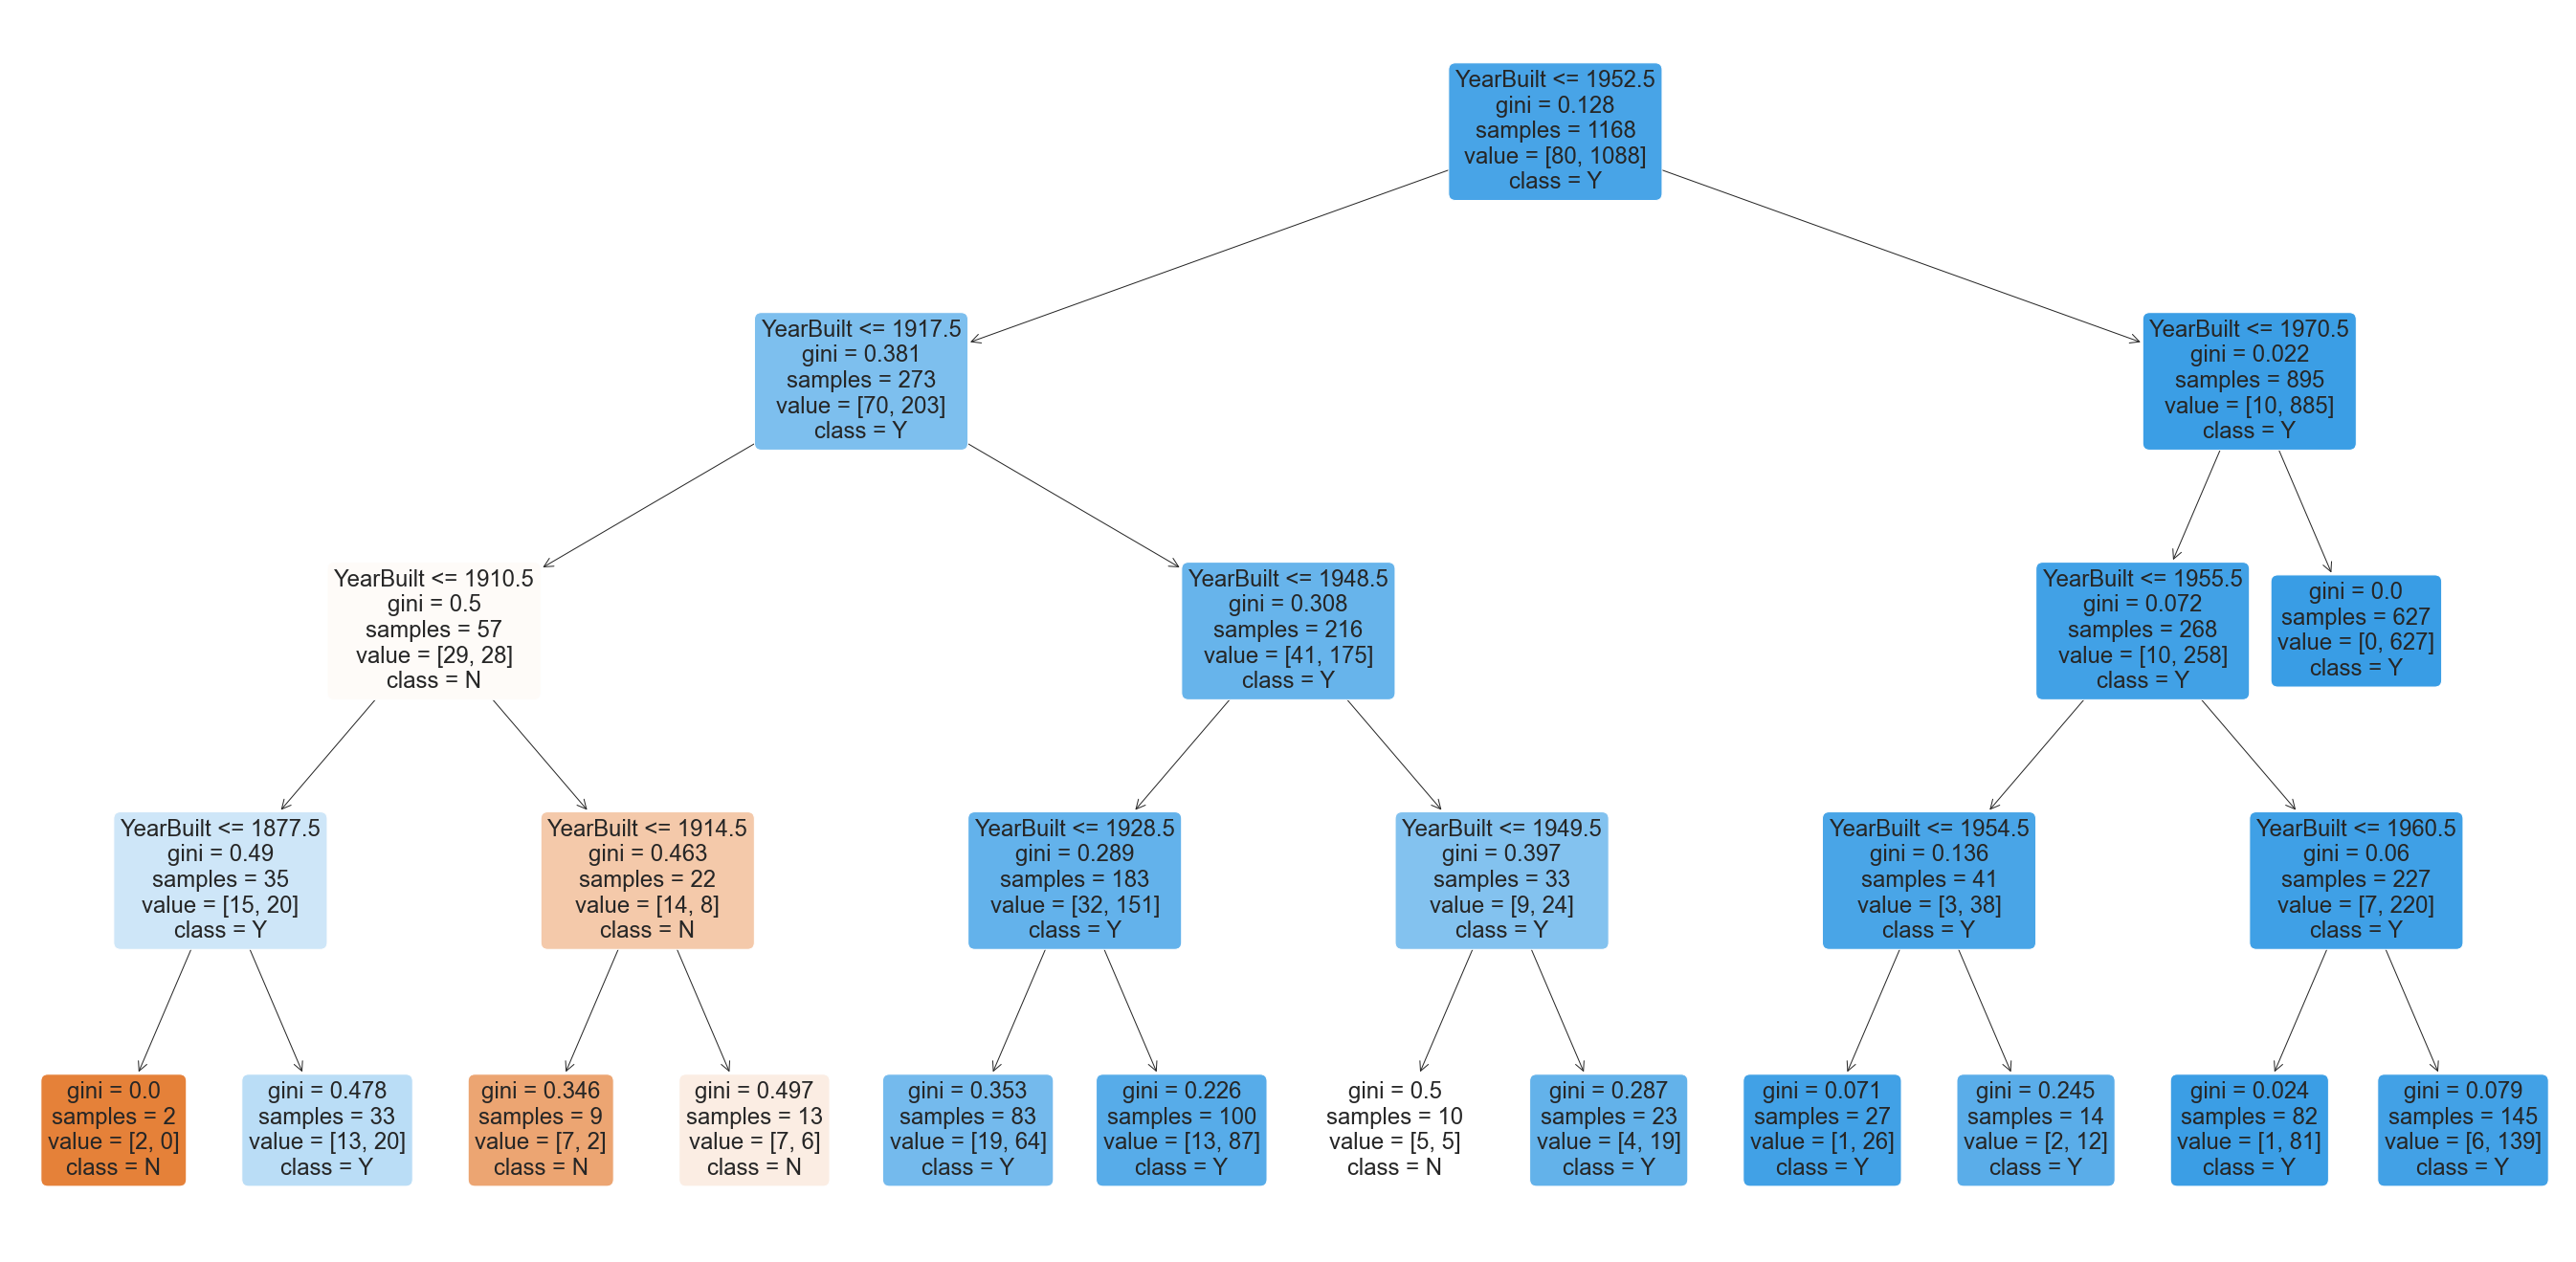

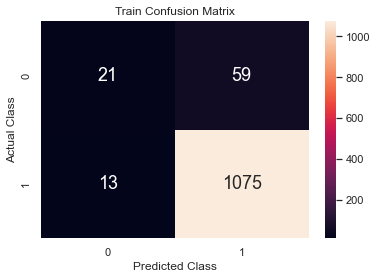

True Positive Rate: 0.9881
False Positive Rate: 0.0119


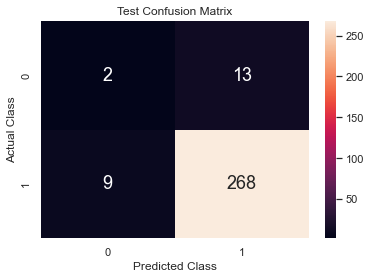

True Positive Rate: 0.9675
False Positive Rate: 0.0325


In [221]:
ClassTree("YearBuilt", "CentralAir", 4)

#### Answer:
Between OverallQual and YearBuilt, OverallQual model seems to be better with higher Classification Accuracy, higher True Positive Rate and lower False Positive Rate.

However, both of these models seem to do a little bit worse than SalePrice model. SalePrice model has higher Classification Accuracy for train set and a little bit lower for test set compared to OverallQual model (but still higher than YearBuilt model). SalePrice model also has higher True Positive Rate and lower False Positive Rate for both train and test sets.

Overall, SalePrice model seems to be the best out of these 3 variables.

---

# Problem 3 : Understanding the Misclassified Samples
In this problem, you will consider finer details of the tree model and try to isolate the misclassified samples for a model.

### (a) Print the Classification Tree of max depth 4 that you fit in Problem 1(a). Note that each leaf node of your tree represents a specific partition of your training data, based on certain conditions given by the splits in the tree. Find out which leaf node of this tree has the highest number of False Positives (FP) in the training dataset and print all samples in the Train set (rows from the dataframe) that end up in this leaf node (partition) during fit.

### (b) Print ONLY the False Positive cases (rows from the dataframe) from the samples (rows) extracted in part (a). 

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.946917808219178

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9315068493150684



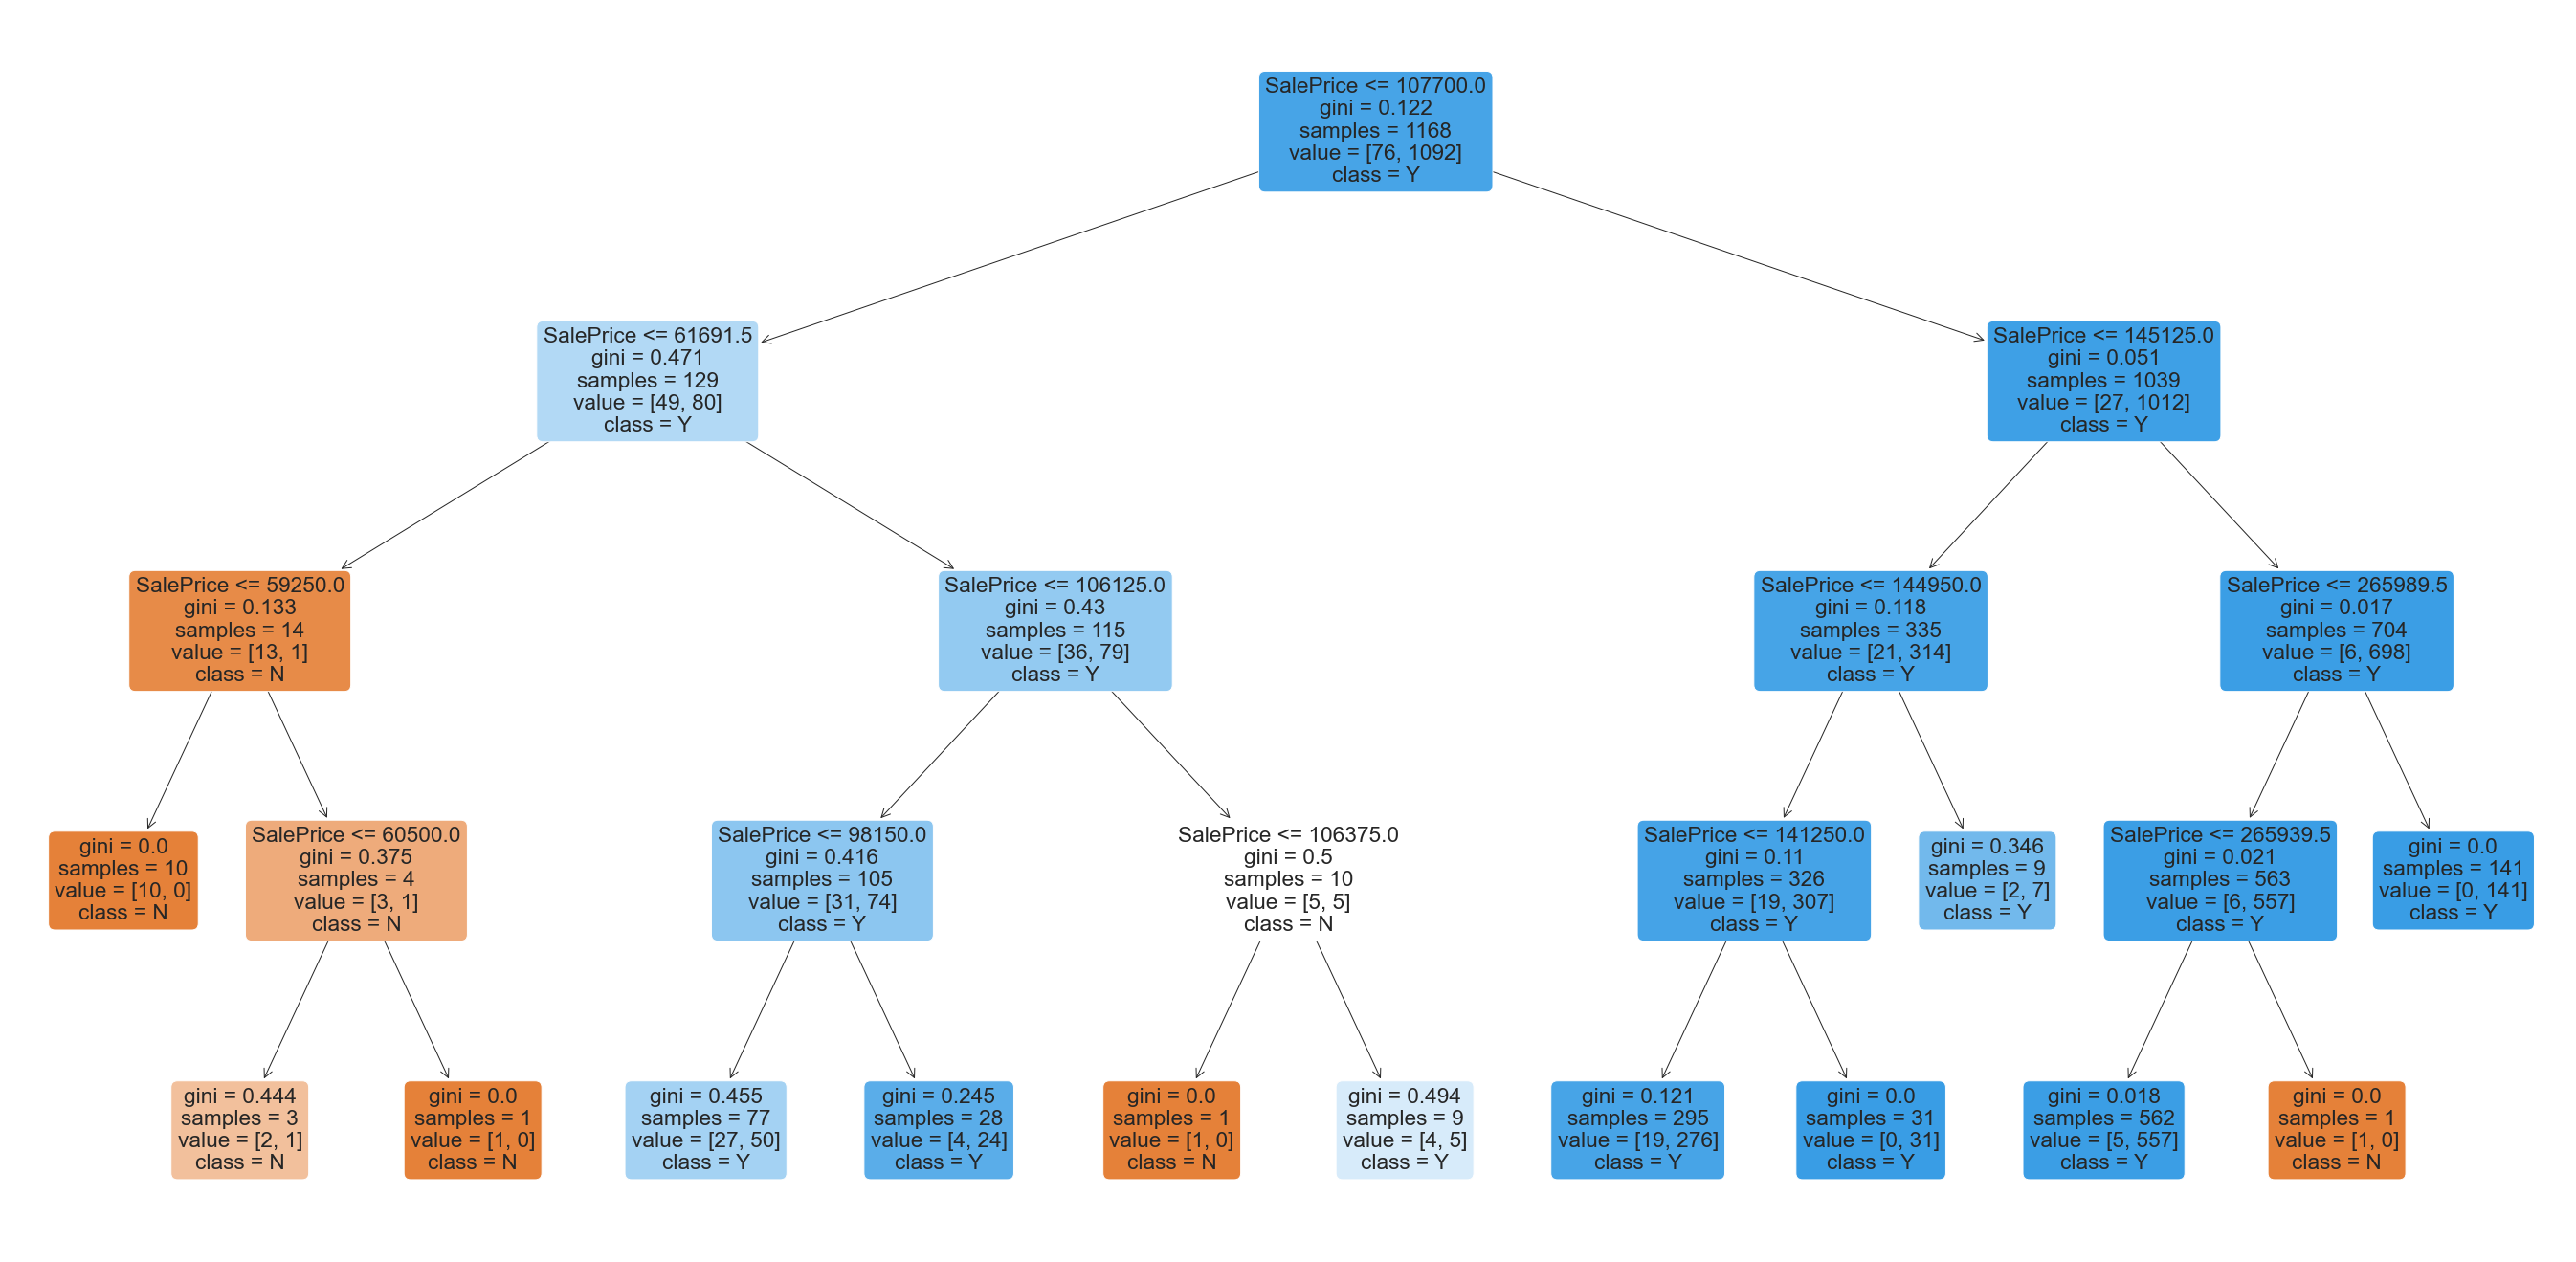

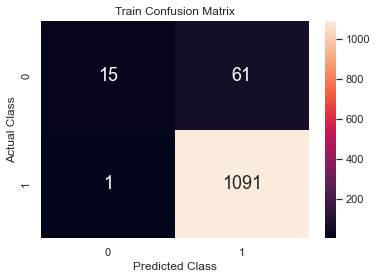

True Positive Rate: 0.9991
False Positive Rate: 0.0009


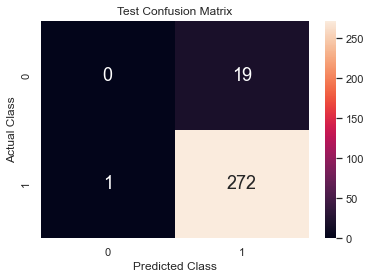

True Positive Rate: 0.9963
False Positive Rate: 0.0037


In [228]:
# Split the data into predictor and response variables
X = pd.DataFrame(data["SalePrice"])
y = pd.DataFrame(data["CentralAir"])

# Split the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the decision tree model to the training data
dtree = DecisionTreeClassifier(max_depth=4)
dtree.fit(X_train, y_train)

# Evaluate the model on the training and testing data
train_acc = dtree.score(X_train, y_train)
test_acc = dtree.score(X_test, y_test)

# Print the accuracy scores
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", train_acc)
print()

print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", test_acc)
print()

# Plot the decision tree
plt.figure(figsize=(48,24))
plot_tree(dtree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["N","Y"])
plt.show()

# Predict response corresponding to predictor
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)

# Plot the two-way Confusion Matrix
plt.figure(figsize=(6,4))
train_cm = confusion_matrix(y_train, y_train_pred)
sb.heatmap(train_cm,
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

TP = train_cm[1][1]
FN = train_cm[1][0]

# Compute the TPR
TPR = TP / (TP + FN)
FPR = FN / (TP + FN)

print("True Positive Rate: {:.4f}".format(TPR))
print("False Positive Rate: {:.4f}".format(FPR))

plt.figure(figsize=(6,4))
test_cm = confusion_matrix(y_test, y_test_pred)
sb.heatmap(test_cm, 
           annot = True, fmt=".0f", annot_kws={"size": 18})
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

TP = test_cm[1][1]
FN = test_cm[1][0]

# Compute the TPR
TPR = TP / (TP + FN)
FPR = FN / (TP + FN)

print("True Positive Rate: {:.4f}".format(TPR))
print("False Positive Rate: {:.4f}".format(FPR))

### Answer:
To find False Positives, we are trying to find the cases where class = N but is predicted to be class = Y. Hence, we should only look at the blue nodes where predicted class = Y.

Within each node, the first number in value brackets is the number of Negative samples. Hence, we should only look at the first number in the bracket of each node.

From the blue nodes with predicted class = Y, the fifth leaf at level 4 has value = [27,50], meaning out of 77 samples, 27 are False Positives. This leaf has the highest number of FPs in the training set.

In [230]:
# Combine the training dataset
train_set = X_train.join(y_train).reindex(X_train.index)

# Check the train_set quickly
print("Train set :", train_set.shape)
print("CentralAir in Train Set")
print(train_set["CentralAir"].value_counts())

Train set : (1168, 2)
CentralAir in Train Set
Y    1092
N      76
Name: CentralAir, dtype: int64


#### All samples in the Train set (rows from the dataframe) that end up in this leaf node (partition) during fit

In [239]:
# Filter to the target leaf node
filter_rule = (61691.5 < train_set["SalePrice"]) & (train_set["SalePrice"] <= 98150.0)
filter_set = train_set[filter_rule]
filter_set

,SalePrice,CentralAir
97,94750,Y
1179,93000,Y
1218,80500,N
398,67000,Y
1049,84900,Y
...,...,...
434,81000,Y
1035,84000,N
494,91300,Y
620,67000,N


#### False Positive cases (rows from the dataframe) from the samples (rows) extracted in part (a)

In [238]:
# Extract the False Positives
fp_set = filter_set[filter_set['CentralAir'] == 'N']
fp_set

,SalePrice,CentralAir
1218,80500,N
39,82000,N
438,90350,N
1137,94000,N
821,93000,N
1062,90000,N
98,83000,N
329,78000,N
342,87500,N
1412,90000,N
